In [20]:
import numpy as np

[[ 1.          1.        ]
 [ 1.         -0.14759234]
 [ 1.13823711 -0.14759234]
 [ 1.13823711  0.77489398]
 [ 1.13823711  0.03339928]
 [ 1.21541297  0.03339928]
 [ 1.28667701  0.03339928]
 [ 1.28667701  0.55688756]
 [ 1.2136904   0.55688756]
 [ 1.14552102  0.55688756]
 [ 1.08179029  0.55688756]
 [ 1.08179029  0.26209325]
 [ 1.08190138  0.26209325]
 [ 1.08199753  0.26209325]
 [ 1.08199753  0.39116566]
 [ 1.05193978  0.39116566]
 [ 1.05193978  0.36425301]
 [ 1.02629583  0.36425301]
 [ 1.00216462  0.36425301]
 [ 0.97950526  0.36425301]
 [ 0.95828184  0.36425301]
 [ 0.95828184  0.3660649 ]
 [ 0.95828184  0.36635163]
 [ 0.95828184  0.36640402]
 [ 0.93872647  0.36640402]
 [ 0.92045248  0.36640402]
 [ 0.90342732  0.36640402]
 [ 0.90342732  0.37537093]
 [ 0.90342732  0.3762586 ]
 [ 0.90342732  0.37642545]
 [ 0.90342732  0.37645941]
 [ 0.90342732  0.37646664]
 [ 0.88678045  0.37646664]
 [ 0.87117045  0.37646664]
 [ 0.85656927  0.37646664]
 [ 0.84294672  0.37646664]
 [ 0.84294672  0.38620014]
 

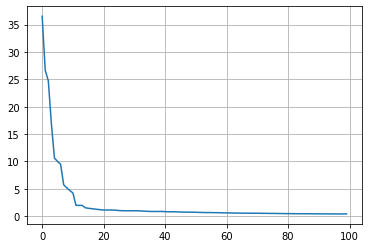

In [21]:
from matplotlib import pyplot as plt
import matplotlib.lines as mlines

def grad_batch(f, batch_size):
    def grad_help(*args):
        h = 1e-5
        dim = len(args)
        batch = set(np.random.choice(np.arange(dim), batch_size, replace=False))
        return [0 if i not in batch else
                (f(*[args[j] + (h if j == i else 0) for j in range(dim)])
                - f(*[args[j] - (h if j == i else 0) for j in range(dim)]))
                /(2*h)
                for i in range(dim)]
    return grad_help

def distance_point(line, point):
    a = np.array(line[:2])
    n = np.array(line[2:])
    return np.linalg.norm((point-a) - (point-a).dot(n)*n)

def distance(line, points):
    return sum(distance_point(line, point) for point in points)

def sgd(f, lr0, d, epoch, x):
    points = np.zeros((epoch, 2))
    points[0] = x
    for i in range(1, epoch):
        x = x - lr0*np.exp(-d*i) * np.array(grad_batch(f, 1)(*x))
        points[i] = x
    return points

def regression(x, y):
    if x.ndim == 1:
        x_mat = np.array([np.full(len(x), 1), x]).T
        k = 2
    else:
        x_mat = np.insert(x, 0, 1, axis=1)
        k = len(np.array(x[0])) + 1
    f = lambda *b: np.linalg.norm((y - x_mat.dot(np.array(b)))**2)
    bs = sgd(f, 0.01, 0.01, 100, np.full(k, 1))
    print(bs)
    # line = lambda *z: np.insert(z,0,1).dot(bs[-1])

    # points = gradient_descent(f, lr0, d, epoch, x)
    ax = plt.figure().add_subplot()
    X = np.arange(len(bs))
    ax.plot(X, np.vectorize(f)(*bs.T))
    ax.grid()
    # if k == 2:
    #     ax = plt.figure().add_subplot()
    #     ax.scatter(x, y)
    #     tmin = points.min() - 1
    #     tmax = points.max() + 1
    #     X = np.array([tmin, tmax])
    #     Y = line(X)
    #     ax.add_line(mlines.Line2D(X, Y))
regression(np.array([-1,0,1,2, 3, 4, 5, 6, 7, 8]), np.array([0, 0,1,1, 2, 2, 3, 3, 4, 4]))
# regression(np.array([[-1,0,1,2, 3, 4, 5, 6, 7, 8], [0, 0,1,1, 2, 2, 3, 3, 4, 4]]))